# Day 2: Geometry optimization and potential energy surfaces

Carefully read the exercise instructions in the script. The Jupyter Notebook contains some additional hints and tricks on how to actually perform the calculations. Further information can be found in the documentations of pymolpro and ASE. 
- check out https://molpro.github.io/pymolpro/modules.html for pymolpro documentation
- check out https://ase-lib.org/ for ASE documentation

### Exercise 1: Geometry optimization of a water molecule

In [73]:
# import the necessary libraries
from ase.visualize import view
from ase.build import molecule
from pymolpro import ASEMolpro
from ase.optimize import BFGS
import matplotlib.pyplot as plt
from ase import Atoms

In [63]:
# build an ase.Atoms object to represent a water molecule (use the molecule function from ase.build,just like last week) 
water = molecule("H2O")

# visualize the molecule
view(water, viewer="x3d")

In [26]:
# Info you can print about the molecule
print("Chemical formula: ", water.get_chemical_formula())
print("Chemical symbols: ", water.get_chemical_symbols())
print("Positions of atoms in xyz format:\n", water.get_positions())
print("Atomic numbers:   ", water.get_atomic_numbers())
print("Masses of atoms:  ", water.get_masses())


Chemical formula:  H2O
Chemical symbols:  ['O', 'H', 'H']
Positions of atoms in xyz format:
 [[ 0.00000000e+00  0.00000000e+00  1.07452203e-01]
 [ 1.47201643e-18  7.48789288e-01 -4.71142101e-01]
 [-1.32430205e-20 -7.48789288e-01 -4.71142101e-01]]
Atomic numbers:    [8 1 1]
Masses of atoms:   [15.999  1.008  1.008]


In [27]:
print("Distance of H-O: ", water.get_distance(0, 1))
print("Distance of H-O: ", water.get_distance(0, 2))
print("Distance of H-H: ", water.get_distance(1, 2))
print("Angle H-O-H:     ", water.get_angle(1, 0, 2))

Distance of H-O:  0.9462857742409627
Distance of H-O:  0.9462857742409627
Distance of H-H:  1.4975785763463723
Angle H-O-H:      104.61301394502519


In [ ]:
# In the next step, you have to optimize the geometry of your molecule. 
# Here we provide you with the exemplary code on how to perform a geometry optimisation using Molpro and ASE:
# First a calculator is set up with the desired ansatz, then the BFGS optimizer is used to optimize the geometry of the molecule.

ATOMS_OBJECT.calc = ASEMolpro(ansatz='XXX')
with BFGS(ATOMS_OBJECT, trajectory='YYY.traj') as opt:
    opt.run(fmax=0.0001)

# replace:
# - XXX with the desired ansatz of the form 'method/basis', for example: 'HF/cc-pVDZ' for a hartree-fock calculation with the cc-pVDZ basis set
# - YYY with the desired name of the trajectory
# - ATOMS_OBJECT with the name of your ASE.atoms object

In [69]:
# Optimize the geometry of the water molecule using Molpro and ASE
water.calc = ASEMolpro(ansatz='RHF/cc-pV(D+d)Z-PP')
with BFGS(water, trajectory='water_opt.traj') as opt:
    opt.run(fmax=0.0001)


      Step     Time          Energy          fmax
BFGS:    0 15:36:50    -2068.773588        1.484015
BFGS:    1 15:36:54    -2068.796612        0.718742
BFGS:    2 15:36:58    -2068.801179        0.084548
BFGS:    3 15:37:03    -2068.801334        0.052826
BFGS:    4 15:37:07    -2068.801500        0.010979
BFGS:    5 15:37:11    -2068.801501        0.001513
BFGS:    6 15:37:16    -2068.801501        0.000016


In [70]:
# You can read the trajectory file to get the positions of the atoms at each step of the optimization:
from ase.io.trajectory import Trajectory

traj = Trajectory('water_opt.traj')
for i, atoms in enumerate(traj):
    print(f"Iteration {i}:")
    print(f"  Energy: {atoms.get_total_energy()}")
    print("  Bond lengths:")
    print("    Distance of H-O: ", atoms.get_distance(0, 1))
    print("    Distance of H-O: ", atoms.get_distance(0, 2))
    print("    Distance of H-H: ", atoms.get_distance(1, 2))
    print("  Angle H-O-H: ", atoms.get_angle(1, 0, 2))

print("\nDifferences:")
print("  Bond length differences:")
print("    H-O: ", traj[0].get_distance(0, 1) - traj[-1].get_distance(0, 1))
print("    H-O: ", traj[0].get_distance(0, 2) - traj[-1].get_distance(0, 2))
print("    H-H: ", traj[0].get_distance(1, 2) - traj[-1].get_distance(1, 2))
print("  Angle difference H-O-H: ", traj[0].get_angle(1, 0, 2) - traj[-1].get_angle(1, 0, 2))

Iteration 0:
  Energy: -2068.7735881644826
  Bond lengths:
    Distance of H-O:  0.9685650182625842
    Distance of H-O:  0.9685650182625842
    Distance of H-H:  1.526478
  Angle H-O-H:  103.99987509868838
Iteration 1:
  Energy: -2068.796612179216
  Bond lengths:
    Distance of H-O:  0.9381589301349582
    Distance of H-O:  0.9381589301349582
    Distance of H-H:  1.4986288707671467
  Angle H-O-H:  106.01368061490675
Iteration 2:
  Energy: -2068.801179181457
  Bond lengths:
    Distance of H-O:  0.9470826667430119
    Distance of H-O:  0.9470826667430119
    Distance of H-H:  1.50476566177828
  Angle H-O-H:  105.20129756677308
Iteration 3:
  Energy: -2068.8013344728065
  Bond lengths:
    Distance of H-O:  0.9466194846860909
    Distance of H-O:  0.9466194846860909
    Distance of H-H:  1.502648957878676
  Angle H-O-H:  105.06380470330797
Iteration 4:
  Energy: -2068.801500169554
  Bond lengths:
    Distance of H-O:  0.9461743325416108
    Distance of H-O:  0.9461743325416108
    Dis

In [74]:
# Visualize the optimized geometry of the water molecule, for example using the x3d or the ngl viewer in ASE
view(atoms, viewer="x3d")

In [ ]:
# You can also visualize the trajectory by using the ase gui in the terminal. The "!" prefix allows running shell commands in Jupyter notebooks.
!ase gui water_opt.traj # replace water.traj with the name of your trajectory file

### Exercise 2: Build distorted molecule and visualize how it behaves during the optimization

In this exercise, we distort the water molecule a bit. For example, you could move one hydrogen atom to a different position. 

In [21]:
# Modify the geometry of the water molecule by changing the position of one of the atoms and print the new positions
distorted_water = molecule("H2O")
pos = distorted_water.get_positions()
pos[1] *= 2
distorted_water.set_positions(pos)


In [22]:
# Visualize the distorted geometry of the water molecule
view(distorted_water, viewer="x3d")


Perform a geometry optimization using the distorted geometry as initial geometry guess.

In [23]:
distorted_water.calc = ASEMolpro(ansatz='RHF/cc-pV(D+d)Z-PP')
with BFGS(distorted_water, trajectory='distorted_water_opt.traj') as opt:
    opt.run(fmax=0.0001)

      Step     Time          Energy          fmax
BFGS:    0 14:15:00    -2063.369187        5.554145
BFGS:    1 14:15:05    -2064.176770        6.228872
BFGS:    2 14:15:09    -2066.243920        7.410775
BFGS:    3 14:15:13    -2067.368640        7.315072
BFGS:    4 14:15:17    -2067.421594        6.853480
BFGS:    5 14:15:21    -2067.547854        6.951904
BFGS:    6 14:15:25    -2067.657741        6.932672
BFGS:    7 14:15:29    -2067.732019        6.777399
BFGS:    8 14:15:33    -2067.877145        7.036301
BFGS:    9 14:15:37    -2068.027781        7.072940
BFGS:   10 14:15:41    -2068.434965        5.628114
BFGS:   11 14:15:45    -2068.648764        3.281638
BFGS:   12 14:15:49    -2068.778867        0.784999
BFGS:   13 14:15:53    -2068.801103        0.215522
BFGS:   14 14:15:57    -2068.801443        0.085848
BFGS:   15 14:16:01    -2068.801501        0.000582
BFGS:   16 14:16:06    -2068.801501        0.000007


In [29]:
view(distorted_water, viewer="x3D")

Compare the number of iterations between the first and the second optimization.

In [25]:
traj = Trajectory('water_opt.traj')

distorted_traj = Trajectory('distorted_water_opt.traj')

print(f"Iterations for nearly optimal water: {len(traj)} Iterations")
print(f"Iterations for distorted water: {len(distorted_traj)} Iterations")

Iterations for nearly optimal water: 7 Iterations
Iterations for distorted water: 17 Iterations


### Dissociation curve of H2

In this exercise we calculate and plot the dissociation curve of H2. Loop over different bondlengths and calculate the energy for each geometry.

Iteration 1: -26.69014eV for 0.4 Å
Iteration 2: -30.02453eV for 0.5 Å
Iteration 3: -31.4376eV for 0.6 Å
Iteration 4: -31.90611eV for 0.7 Å
Iteration 5: -31.88688eV for 0.8 Å
Iteration 6: -31.61372eV for 0.9 Å
Iteration 7: -31.21425eV for 1.0 Å
Iteration 8: -30.76122eV for 1.1 Å
Iteration 9: -30.29734eV for 1.2 Å
Iteration 10: -29.84813eV for 1.3 Å
Iteration 11: -29.42889eV for 1.4 Å
Iteration 12: -29.04843eV for 1.5 Å
Iteration 13: -28.71128eV for 1.6 Å
Iteration 14: -28.41892eV for 1.7 Å
Iteration 15: -28.17057eV for 1.8 Å
Iteration 16: -27.96376eV for 1.9 Å
Iteration 17: -27.79475eV for 2.0 Å
Iteration 18: -27.65904eV for 2.1 Å
Iteration 19: -27.55175eV for 2.2 Å
Iteration 20: -27.46809eV for 2.3 Å
Iteration 21: -27.40361eV for 2.4 Å
Iteration 22: -27.3544eV for 2.5 Å
Iteration 23: -27.31715eV for 2.6 Å
Iteration 24: -27.28914eV for 2.7 Å
Iteration 25: -27.2682eV for 2.8 Å
Iteration 26: -27.25261eV for 2.9 Å
Iteration 27: -27.24106eV for 3.0 Å
Iteration 28: -27.23252eV for 3.1 Å
Iter

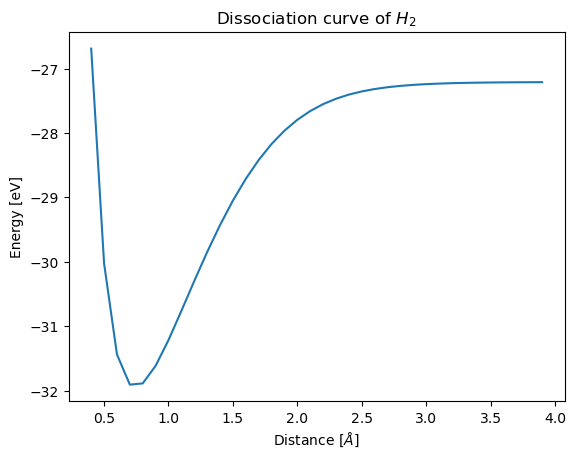

In [47]:
import numpy as np

# list of bond lengths to scan (in Angstrom)
# distances = [0.4, 0.6, 0.9, 1.0, 1.1, 1.6, 2.0, 3.0, 4.0]
distances = np.arange(0.4, 4.0, 0.1)

# empty list to store the energies
energies = []

# Loop over the bond lengths, build the (distorted) H2 molecule and calculate the energy for each geometry.
for i, dist in enumerate(distances):
    H2 = Atoms("HH", positions=[(0, 0, 0), (0, 0, dist)])
    H2.calc = ASEMolpro(ansatz='FCI/cc-pV(Q+d)Z-PP')
    energies.append(H2.get_total_energy())
    # Print the bond length and energy for each geometry
    print(f"Iteration {i+1}: {energies[-1]:.5f)}eV for {round(dist, 1)} Å") 

# Plot the dissociation curve. Don't forget to label the axes and add a title to the plot.
plt.plot(distances, energies)
plt.xlabel(r"Distance [$\AA$]")
plt.ylabel("Energy [eV]")
plt.title("Dissociation curve of $H_2$")
plt.show()